In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/default.ASUS/Downloads/law_firm_sales.csv')

In [3]:
df.head()

,Invoice ID,Client Name,Service Type,Case Type,Invoice Date,Hours Billed,Rate per Hour,Total Fees,Payment Status
0,1000,Adam Bolton,Legal Advisory,Family Law,2024-11-08,3.2,350,1120.0,Paid
1,1001,Michelle Wolfe,Contract Review,Employment Law,2024-04-13,1.4,300,420.0,Paid
2,1002,Isaac Ochoa,Consultation,Business Law,2025-02-13,7.9,300,2370.0,Paid
3,1003,Morgan Smith DDS,Litigation,Corporate Law,2024-12-06,9.9,400,3960.0,Paid
4,1004,Erik Brown,Litigation,Family Law,2025-02-17,3.6,350,1260.0,Paid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice ID      1000 non-null   int64  
 1   Client Name     1000 non-null   object 
 2   Service Type    1000 non-null   object 
 3   Case Type       1000 non-null   object 
 4   Invoice Date    1000 non-null   object 
 5   Hours Billed    1000 non-null   float64
 6   Rate per Hour   1000 non-null   int64  
 7   Total Fees      1000 non-null   float64
 8   Payment Status  1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Invoice ID,Hours Billed,Rate per Hour,Total Fees
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,5.499700,326.800000,1786.370000
std,288.819436,2.623859,55.721314,903.386174
min,1000.000000,1.000000,250.000000,250.000000
25%,1249.750000,3.200000,300.000000,1022.500000
50%,1499.500000,5.400000,350.000000,1710.000000
75%,1749.250000,7.800000,400.000000,2452.500000
max,1999.000000,10.000000,400.000000,3960.000000


In [6]:
df.isnull().sum()

Invoice ID        0
Client Name       0
Service Type      0
Case Type         0
Invoice Date      0
Hours Billed      0
Rate per Hour     0
Total Fees        0
Payment Status    0
dtype: int64

In [7]:
# Total sales
total_revenue = df['Total Fees'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $1786370.00


In [8]:
# Monthly sales
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [9]:
df.dtypes

Invoice ID                 int64
Client Name               object
Service Type              object
Case Type                 object
Invoice Date      datetime64[ns]
Hours Billed             float64
Rate per Hour              int64
Total Fees               float64
Payment Status            object
dtype: object

In [10]:
# Extract year and month for grouping
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')

# Group by month and sum Total Fees
monthly_revenue = df.groupby('Year-Month')['Total Fees'].sum()

# Display the revenue per month
print(monthly_revenue)

Year-Month
2024-03    105815.0
2024-04    156885.0
2024-05    157715.0
2024-06    131585.0
2024-07    131465.0
2024-08    137560.0
2024-09    162735.0
2024-10    140765.0
2024-11    136540.0
2024-12    161080.0
2025-01    172735.0
2025-02    155025.0
2025-03     36465.0
Freq: M, Name: Total Fees, dtype: float64


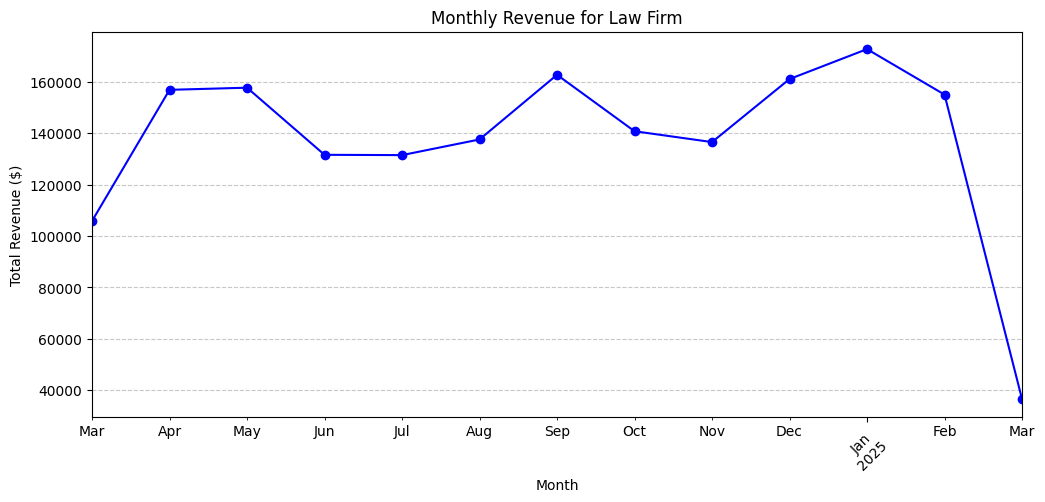

In [11]:
# Plot the monthly revenue as a line chart
plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='line', marker='o', color='blue', linestyle='-')

# Customize the chart
plt.title('Monthly Revenue for Law Firm')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [12]:
# Group by 'Service Type' and calculate average revenue
revenue_by_service = df.groupby('Service Type')['Total Fees'].mean()

# Print total revenue per service type correctly
print("Total Revenue by Service Type:\n")
for service, revenue in revenue_by_service.items():
    print(f"{service}: ${revenue:.2f}")

Total Revenue by Service Type:

Consultation: $1760.13
Contract Review: $1753.17
Estate Planning: $1872.48
Legal Advisory: $1759.13
Litigation: $1812.77
Mediation: $1764.01


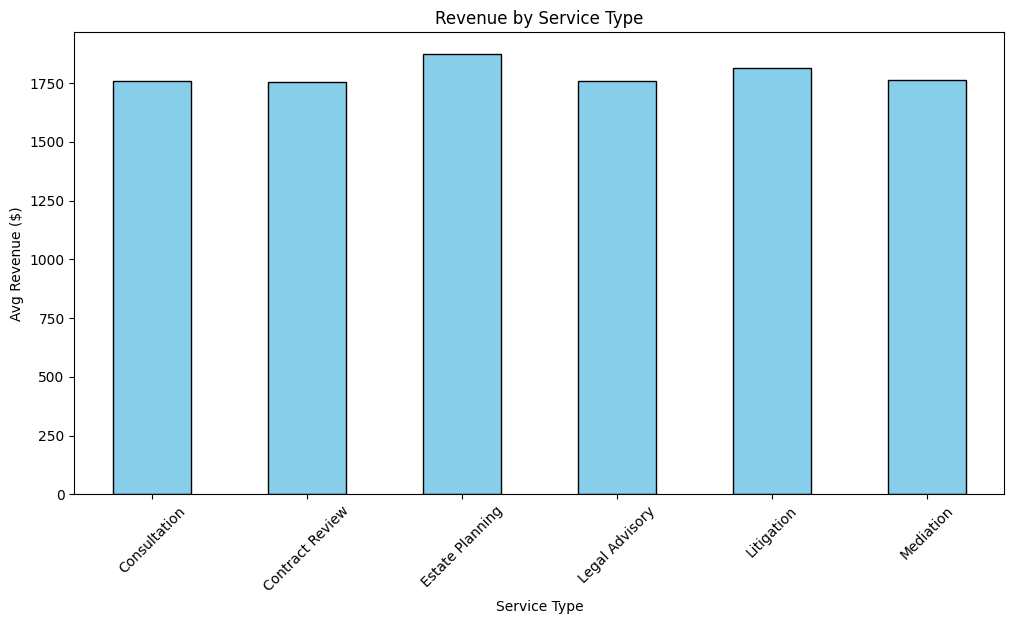

In [13]:
plt.figure(figsize=(12, 6))
revenue_by_service.plot(kind='bar', color='skyblue', edgecolor='black')

# Corrected labels
plt.title('Revenue by Service Type')
plt.xlabel('Service Type')  # X-axis should be Service Type
plt.ylabel('Avg Revenue ($)')  # Y-axis should be Avg Revenue

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [14]:
# Payment Status Distribution
payment_status_counts = df['Payment Status'].value_counts()
print("\nPayment Status Distribution:")
print(payment_status_counts)


Payment Status Distribution:
Payment Status
Paid       699
Pending    188
Overdue    113
Name: count, dtype: int64


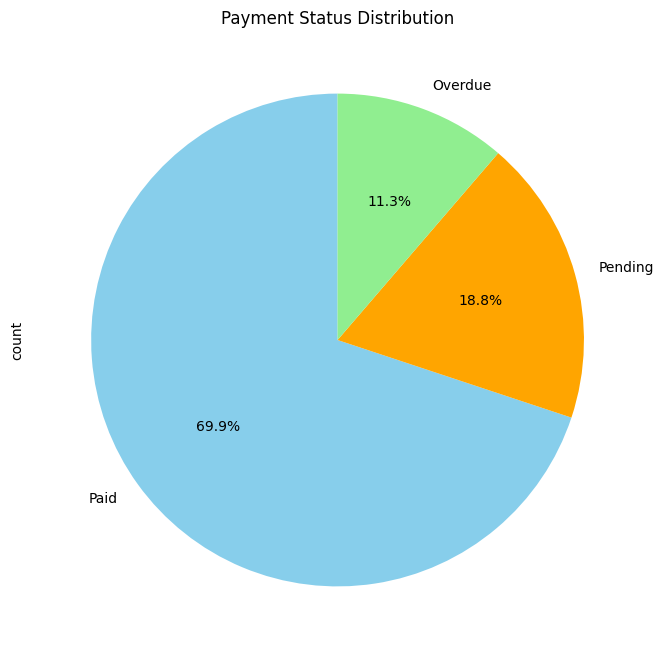

In [16]:
plt.figure(figsize=(8, 8))
payment_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Payment Status Distribution')
plt.show()